In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def add(A,B):
    assert A.shape[0]==B.shape[0]
    assert A.shape[1]==B.shape[1]
    res=np.zeros((A.shape[0],A.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            res[i,j]=A[i,j]+B[i,j]
    return res

In [3]:
def transpose(A):
    res=np.array([[0. for j in range(A.shape[0])] for i in range(A.shape[1])])
    for j in range(A.shape[1]):
        res[j]=A[:,j]
    return res

In [4]:
def dot(A,B):
    assert A.shape[1]==B.shape[0]
    res=np.array([[0. for j in range(B.shape[1])] for i in range(A.shape[0])])
    for i in range(A.shape[0]):
        row_A=A[i,:]
        for j in range(B.shape[1]):
            column_B=B[:,j]
            res[i,j]=sum(row_A*column_B)
    return res

In [5]:
def swap(A,v_1,v_2):
    A[[v_1,v_2]]=A[[v_2,v_1]]
    return A

In [6]:
def inverse(A):
    p=A.shape[0]
    I=np.identity(p)
    for i in range(p):
        if(A[i,i]!=1):
            temp=A[i,i]
            A[i]/=temp
            I[i]/=temp
        for j in range(p):
            if(A[j,i]!=0 and j!=i):
                temp=A[j,i]
                A[j]-=A[i]*temp
                I[j]-=I[i]*temp
    return I

In [7]:
def LU_decomposition(A):
    L=np.identity(A.shape[0])
    U=np.zeros((A.shape[0],A.shape[1]))
    U[0]=A[0]
    for i in range(1,A.shape[0]):
        for j in range(A.shape[1]):
            if(j<i):
                L[i,j]=A[i,j]
                for k in range(j):
                    L[i,j]-=U[k,j]*L[i,k]
                L[i,j]/=U[j,j]
            else:
                U[i,j]=A[i,j]
                for k in range(i):
                    U[i,j]-=U[k,j]*L[i,k]
    return L,U

In [160]:
def find_inverse(A):
    L,U=LU_decomposition(A)
    return dot(inverse(U),inverse(L))  # A=LU, A^(-1)=U^(-1)*L^(-1)

In [9]:
def matrix_norm(A):
    temp=0.
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            temp+=A[i,j]**2
    return temp

In [10]:
def f(x,coef):
    res=0
    degree=coef.shape[0]-1
    for i in range(degree+1):
        res+=(x**(degree-i))*coef[i]
    return res

In [11]:
def read_file(file_path):
    x=np.array([[]])
    y=np.array([[]])
    with open(file_path) as f:
        rows=csv.reader(f)
        for row in rows:
            x=np.append(x,[[float(row[0])]],axis=1)
            y=np.append(y,[[float(row[1])]],axis=1)
    return x,y

In [12]:
def print_result(A,x,b):
    res='Fitting line: '
    if(len(x)!=1):
        res+=str(x[0,0])+'X^'+str(len(x)-1)
        for i in range(1,len(x)-1):
            if(x[i,0]>=0):
                res+=' + '
            else:
                res+=' - '
            res+=str(abs(x[i,0]))+'X^'+str(len(x)-i-1)
    if(x[-1,0]>=0):
        res+=' + '
    else:
        res+=' - '
    res+=str(abs(x[-1,0]))
    print(res)
    print('Total error: ', matrix_norm(dot(A,x)-b))
    

In [296]:
file_path=input('Please give the path of the test file: ')

Please give the path of the test file: testfile.txt


In [304]:
N=int(input('Please assign the number of polynomial bases n:'))
lambda_LSE=float(input('Please assign lambda: '))

Please assign the number of polynomial bases n:5
Please assign lambda: 1


In [305]:
# LSE/rLSE

x,y=read_file(file_path)
b=transpose(y)
design_matrix=np.array([[x[0,i]**h for h in range(N-1,-1,-1)] for i in range(x.shape[1])])
design_matrix_T=transpose(design_matrix)
lambda_I = np.identity(N)*float(lambda_LSE)
coef_X_LSE=dot(find_inverse(add(dot(design_matrix_T,design_matrix),lambda_I)),dot(design_matrix_T,b))

In [306]:
# Newton's method
coef_X_Newton=dot(find_inverse(dot(design_matrix_T,design_matrix)),dot(design_matrix_T,b))

In [307]:
print('LSE:')
print_result(design_matrix,coef_X_LSE,b)
print('')
print('Newton\'s method:')
print_result(design_matrix,coef_X_Newton,b)

LSE:
Fitting line: -0.00410291176583083X^4 + 0.12960894038205079X^3 + 3.122603867602649X^2 + 1.8264923091182221X^1 + 0.2835841892382973
Total error:  8.699314472397743

Newton's method:
Fitting line: 0.0X^4 - 0.08984375X^3 + 3.0X^2 + 7.25X^1 - 32.0
Total error:  4228.071920698741


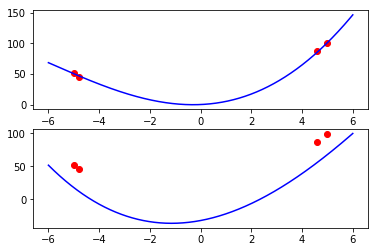

In [308]:
t=np.arange(-6,6,0.001)
plt.subplot(2,1,1)
plt.plot(x,y,'ro')
plt.plot(t,f(t,coef_X_LSE),'b')

plt.subplot(2,1,2)
plt.plot(x,y,'ro')
plt.plot(t,f(t,coef_X_Newton),'b')

plt.show()

In [309]:
res=[x[0,i] for i in range(x.shape[1])]
res2=[y[0,i] for i in range(y.shape[1])]

In [311]:
ff=np.polyfit(res,res2,4)
ff

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([ 0.0472358 , -0.08563021,  0.98401879,  6.94307603, 21.65281241])

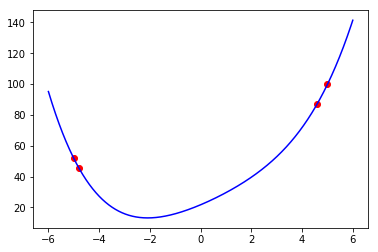

In [312]:
plt.plot(x,y,'ro')
plt.plot(t,f(t,ff),'b')

plt.show()